# wordcloud

In [28]:
import re
from sklearn import preprocessing

In [29]:
def load_data(file_path):
    """ Load the csv file and return a Dataframe. """
    df = pd.read_csv(file_path, delimiter=',')
    return df

def clean_text(text):
    """ clean the text by removing special characters, punctuations, etc. """
    text = text.lower()
    remove_xx_seq  = re.compile('xx+')
    replace_by_space = re.compile('[/(){}\[\]\|@,;]')
    remove_special_characters = re.compile('[^0-9a-z +]')
    remove_extra_space = re.compile('[^A-Za-z0-9]+')
    remove_numbers = re.compile('[0-9]+')
    text = re.sub(remove_xx_seq, ' ', text)
    text = re.sub(replace_by_space, ' ', text)
    text = re.sub(remove_special_characters, ' ', text)
    text = re.sub(remove_numbers, ' ', text)
    text = re.sub(remove_extra_space, ' ', text)
    return text.strip()

def preprocess_corpus(df, column='Text1'):
    """ Preprocess the entire corpus including cleaning the text documents and return the updated dataframe. """
    df[column] = df[column].apply(clean_text)
    return df

In [30]:
import pandas as pd
df = pd.read_csv('text_all.csv')

In [31]:
# Preprocess the corpus - clean the dataset 
print('Cleaning the text...', end='')
df = preprocess_corpus(df, column='Text1')
print('done.')


Cleaning the text...done.


In [32]:
text_count_df = df.groupby(['Type']).count()
text_count_df

,UserName,Handle,Timestamp,Text1,Emojis,Comments,Likes,Retweets,text
Type,,,,,,,,,
Cases,2,2,2,2,0,0,1,2,2
Deaths,1,1,1,1,0,0,0,0,1
Cases,89,88,90,90,7,26,47,50,90
Cluster,30,30,30,30,0,3,15,16,30
Deaths,48,48,48,48,4,15,27,33,48
Entertainment,13,13,13,13,8,1,3,8,13
Global,70,70,70,70,2,13,42,47,70
"News, Malaysia",917,922,923,924,100,224,406,527,924
Politic,3,3,3,3,0,1,3,3,3


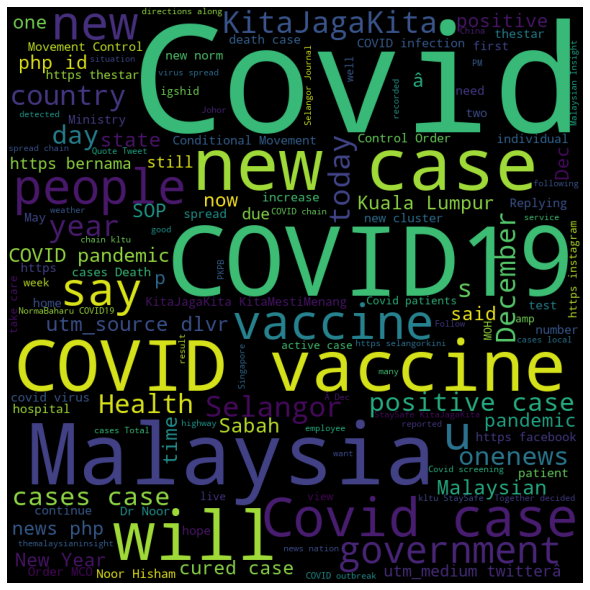

In [33]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
tags = ''
for index, row in df.iterrows():
    tags = tags + ' ' + row['text']
    
stopwords = set(STOPWORDS)
wordcloud_tac_repro = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tags) 
             
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_tac_repro) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()